In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\bhanj\python\Project101\country_vaccinations_by_manufacturer.csv")
df

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2
...,...,...,...,...
35618,European Union,2022-03-29,Oxford/AstraZeneca,67403106
35619,European Union,2022-03-29,Pfizer/BioNTech,600519998
35620,European Union,2022-03-29,Sinopharm/Beijing,2301516
35621,European Union,2022-03-29,Sinovac,1809


In [3]:
# Dataset Exploration

In [4]:
df.head(10)

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2
5,Argentina,2020-12-30,Oxford/AstraZeneca,3
6,Argentina,2020-12-30,Sinopharm/Beijing,1
7,Argentina,2020-12-30,Sputnik V,40583
8,Argentina,2020-12-31,Moderna,2
9,Argentina,2020-12-31,Oxford/AstraZeneca,3


In [5]:
df.shape
## (35623, 4)

(35623, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [7]:
df.nunique()
## 43 countries, 10 vaccine company

location                 43
date                    473
vaccine                  10
total_vaccinations    29210
dtype: int64

In [8]:
df.isnull().sum()
## no missing values

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

In [9]:
# 2. Basic Descriptive Analysis

In [10]:
df["location"].nunique()
## unique country

43

In [11]:
df["vaccine"].nunique()
##unique vaccine

10

In [12]:
min(df["date"])

'2020-12-04'

In [13]:
max(df["date"])

'2022-03-30'

In [14]:
df.groupby("location").agg({"date": "count"}).sort_values(by = "date" , ascending = False).head()
# df.groupby("location")["date"].count().sort_values(ascending=False)
# countries with highest no. of records


,date
location,
European Union,4122
Argentina,2629
Germany,2290
South Korea,1985
Latvia,1664


In [15]:
# 3. Country-Level Insights

In [16]:
vaccination_by_country = df.groupby("location")["total_vaccinations"].sum().sort_values(ascending = False).reset_index()
vaccination_by_country.head(5)
# Top 5 countries by total vaccinations.

,location,total_vaccinations
0,European Union,193020139251
1,United States,139944068653
2,Germany,38982830332
3,France,32177039372
4,Italy,28306588441


In [17]:
vaccination_by_country["percentage_vaccination"] = (vaccination_by_country["total_vaccinations"]/sum(vaccination_by_country["total_vaccinations"]))*100
vaccination_by_country

,location,total_vaccinations,percentage_vaccination
0,European Union,193020139251,35.922608
1,United States,139944068653,26.044723
2,Germany,38982830332,7.255020
3,France,32177039372,5.988407
4,Italy,28306588441,5.268085
5,South Korea,21786515369,4.054647
6,Argentina,18678951288,3.476304
7,Peru,10520125014,1.957880
8,Chile,9931757732,1.848380
9,Ecuador,4599104870,0.855931


Text(0, 0.5, 'Percentage')

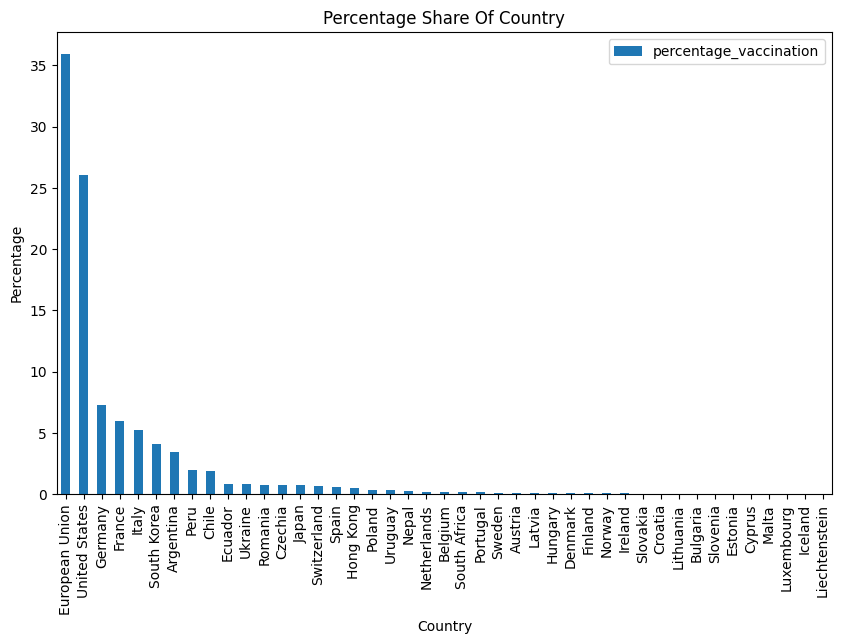

In [18]:
vaccination_by_country.plot(
    kind = "bar",
    x = "location",
    y = "percentage_vaccination",
    figsize = (10,6)
)
plt.title("Percentage Share Of Country")
plt.xlabel("Country")
plt.ylabel("Percentage")


In [19]:
# Countries that used the highest number of different manufacturers.
vaccine_used_by_country = df.groupby("location")["vaccine"].nunique().sort_values(ascending = False)
vaccine_used_by_country.head()

location
European Union    9
Portugal          8
Latvia            7
Hungary           6
Argentina         6
Name: vaccine, dtype: int64

In [20]:
# Country that started earliest and country that started latest.
country_date = df.groupby("location")["date"].min().sort_values()
earliest = country_date.head(1)
latest = country_date.tail(1)

In [21]:
[earliest,latest]

[location
 Latvia    2020-12-04
 Name: date, dtype: object,
 location
 South Africa    2022-03-04
 Name: date, dtype: object]

In [22]:
# 4. Manufacturer-Level Insights

In [23]:
# Total vaccinations per manufacturer (global).
vaccinations_per_company = df.groupby("vaccine")["total_vaccinations"].sum().sort_values(ascending = False)
vaccinations_per_company

vaccine
Pfizer/BioNTech       344835955037
Moderna               103072147621
Oxford/AstraZeneca     46451509497
Sinovac                13407163275
Johnson&Johnson        12611375881
Sinopharm/Beijing      10877006517
Sputnik V               5787343199
CanSino                  271397675
Novavax                    8268113
Covaxin                       3572
Name: total_vaccinations, dtype: int64

In [24]:
# Manufacturer used in the most number of countries.
manufacture_by_country = df.groupby("vaccine")["location"].nunique().sort_values(ascending = False).reset_index().rename(columns={"location": "num_countries"})
manufacture_by_country

,vaccine,num_countries
0,Pfizer/BioNTech,43
1,Moderna,37
2,Oxford/AstraZeneca,37
3,Johnson&Johnson,35
4,Novavax,18
5,Sinovac,8
6,Sinopharm/Beijing,7
7,Sputnik V,4
8,CanSino,3
9,Covaxin,2


Text(0.5, 0, 'Number of Country')

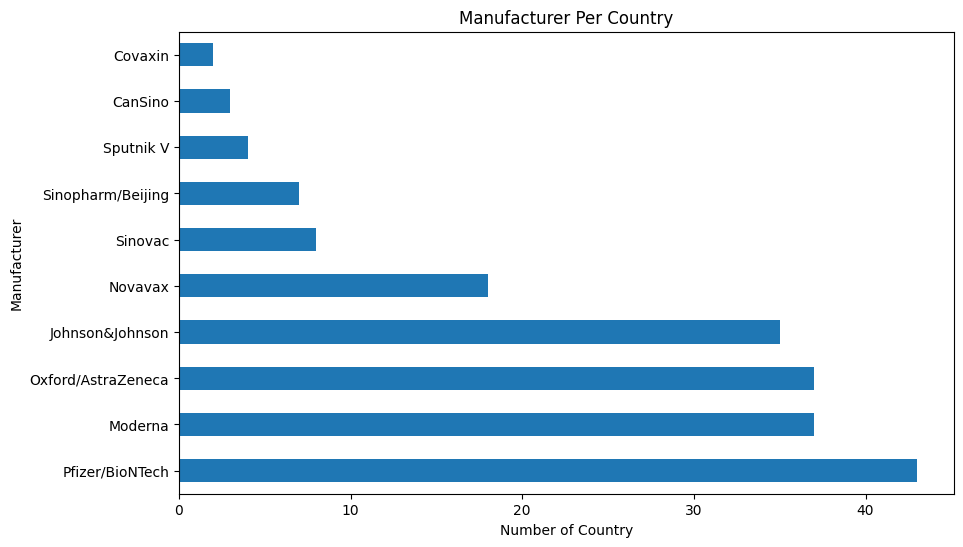

In [25]:
manufacture_by_country.plot(
    x = "vaccine",
    y = "num_countries",
    kind = "barh",
    figsize = (10,6),
    legend = False
)
plt.title("Manufacturer Per Country")
plt.ylabel("Manufacturer")
plt.xlabel("Number of Country")


In [26]:
# Top 3 most widely used vaccines.
# vaccinations_per_company = df.groupby("vaccine")["total_vaccinations"].sum().sort_values(ascending = False)
# vaccinations_per_company.head(3)
vaccinations_per_company = (
    df.groupby("vaccine")["total_vaccinations"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print(vaccinations_per_company.head(3))


              vaccine  total_vaccinations
0     Pfizer/BioNTech        344835955037
1             Moderna        103072147621
2  Oxford/AstraZeneca         46451509497


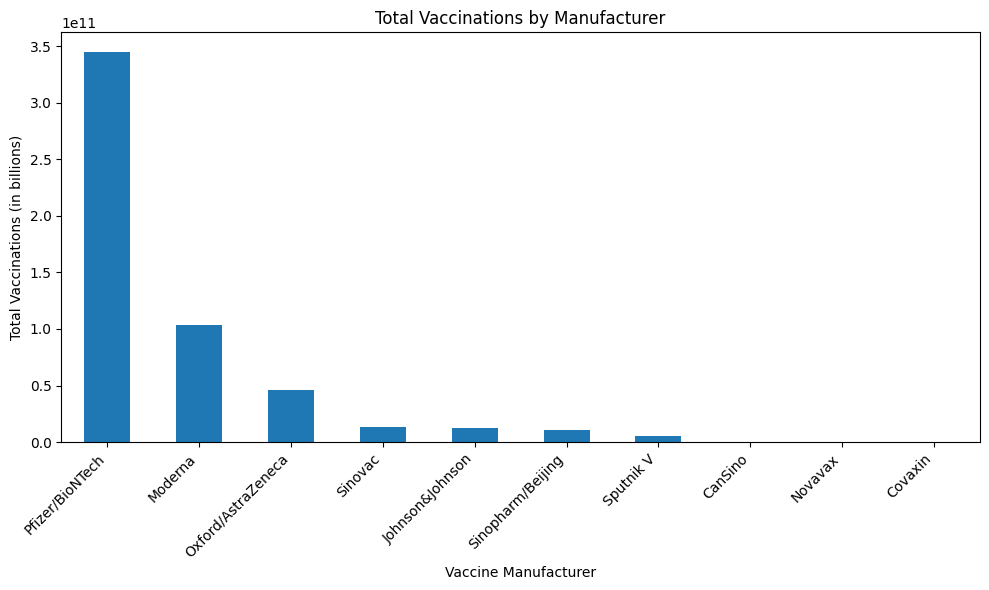

In [27]:
vaccinations_per_company.plot(
    x="vaccine",
    y="total_vaccinations",
    kind="bar",
    figsize=(10,6),
    legend=False
)

plt.title("Total Vaccinations by Manufacturer")
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Total Vaccinations (in billions)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [28]:
# European Union Analysis

In [29]:
europe = df[df["location"] == "European Union"]
europe

,location,date,vaccine,total_vaccinations
31501,European Union,2020-12-27,Covaxin,0
31502,European Union,2020-12-27,Johnson&Johnson,0
31503,European Union,2020-12-27,Moderna,14
31504,European Union,2020-12-27,Novavax,0
31505,European Union,2020-12-27,Oxford/AstraZeneca,1
...,...,...,...,...
35618,European Union,2022-03-29,Oxford/AstraZeneca,67403106
35619,European Union,2022-03-29,Pfizer/BioNTech,600519998
35620,European Union,2022-03-29,Sinopharm/Beijing,2301516
35621,European Union,2022-03-29,Sinovac,1809


In [41]:
# Manufacturer Market Share in EU

# Compare total vaccinations by manufacturer within EU.

# Insight: Which vaccine dominated (Pfizer, AstraZeneca, etc.), and what % each contributed.
eu_manufacturer = europe.groupby("vaccine")["total_vaccinations"].sum().sort_values(ascending = False).reset_index()
eu_manufacturer["share_by_manufacturer"] = (eu_manufacturer["total_vaccinations"]/sum(eu_manufacturer["total_vaccinations"]))*100
eu_manufacturer

,vaccine,total_vaccinations,share_by_manufacturer
0,Pfizer/BioNTech,141033652111,73.066807
1,Moderna,24391892210,12.636967
2,Oxford/AstraZeneca,21700612979,11.242668
3,Johnson&Johnson,4519774120,2.341608
4,Sinopharm/Beijing,743871062,0.385385
5,Sputnik V,627748875,0.325225
6,Novavax,2066859,0.001071
7,Sinovac,517529,0.000268
8,Covaxin,3506,0.000002


In [45]:
limit = 0.01
small = eu_manufacturer[eu_manufacturer["share_by_manufacturer"] < limit]
large = eu_manufacturer[eu_manufacturer["share_by_manufacturer"] >= limit]
others = pd.DataFrame({
    "vaccine": ["Others"],
    "share_by_manufacturer": [small["share_by_manufacturer"].sum()]
})
pie_data = pd.concat([large, others]).reset_index()

  
                  


In [59]:
# pie_data.set_index("vaccine")["share_by_manufacturer"].plot(
#     kind="pie",
#     figsize=(8,8),
#     autopct="%1.1f%%",
#     startangle=90,
#     ylabel="",
#     label = None
# )
# plt.title("EU Vaccine Market Share (Grouped Small Values as Others)")
# plt.legend(title="Manufacturer", bbox_to_anchor=(1.2, 0.8))
# plt.show()

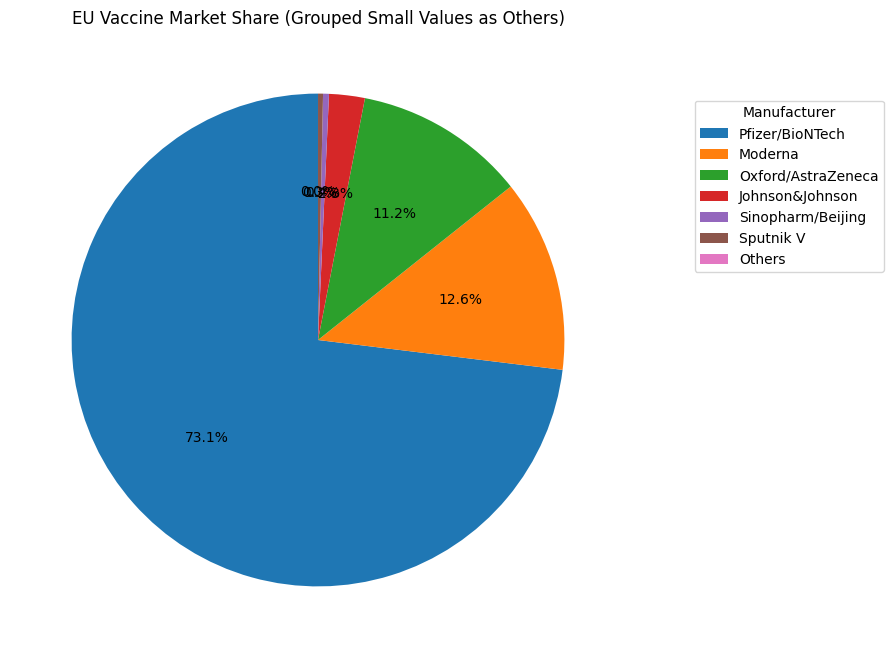

In [51]:
ax = pie_data.set_index("vaccine")["share_by_manufacturer"].plot(
    kind="pie",
    figsize=(8,8),
    autopct="%1.1f%%",   # show % values
    startangle=90,
    ylabel="",           # remove default ylabel
    legend=False,        # don’t let pandas auto-legend
    labels=None          # remove labels from slices
)

# Add legend separately
plt.legend(
    labels=pie_data["vaccine"], 
    title="Manufacturer", 
    bbox_to_anchor=(1.1, 0.9)
)

plt.title("EU Vaccine Market Share (Grouped Small Values as Others)")
plt.show()


In [56]:
# eu_manufacturer.set_index("vaccine")["share_by_manufacturer"].plot(
#     kind="pie",
#     figsize=(8,8),
#     autopct="%1.1f%%",
#     startangle=90,
#     ylabel=""
# )
# plt.title("EU Vaccine Market Share")
# plt.legend(title="Manufacturer", bbox_to_anchor=(1.2, 0.8))
# plt.show()


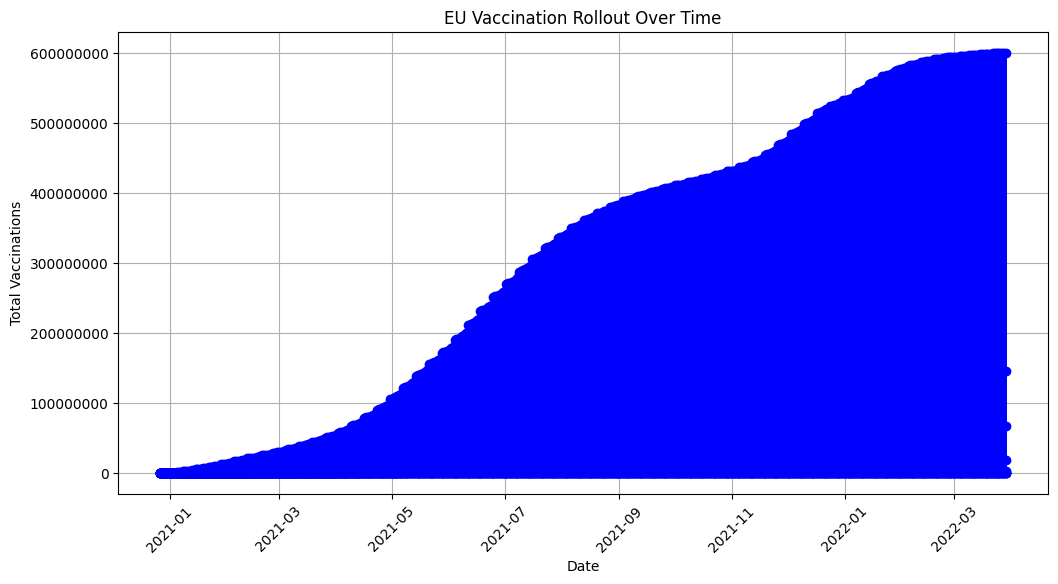

In [68]:
# EU Vaccination Rollout Over Time
europe.sort_values("date")
plt.figure(figsize=(12,6))
plt.plot(europe["date"], europe["total_vaccinations"], marker="o", linestyle="-", color="blue")

plt.title("EU Vaccination Rollout Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()